In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from finta import TA
import mplfinance as mpf
from pandas_datareader import data as web

%matplotlib notebook

In [2]:
df = pd.read_csv('./data/MSFT_daily.csv',header=0, index_col="date", parse_dates=True)

df = df.iloc[::-1]


<IPython.core.display.Javascript object>


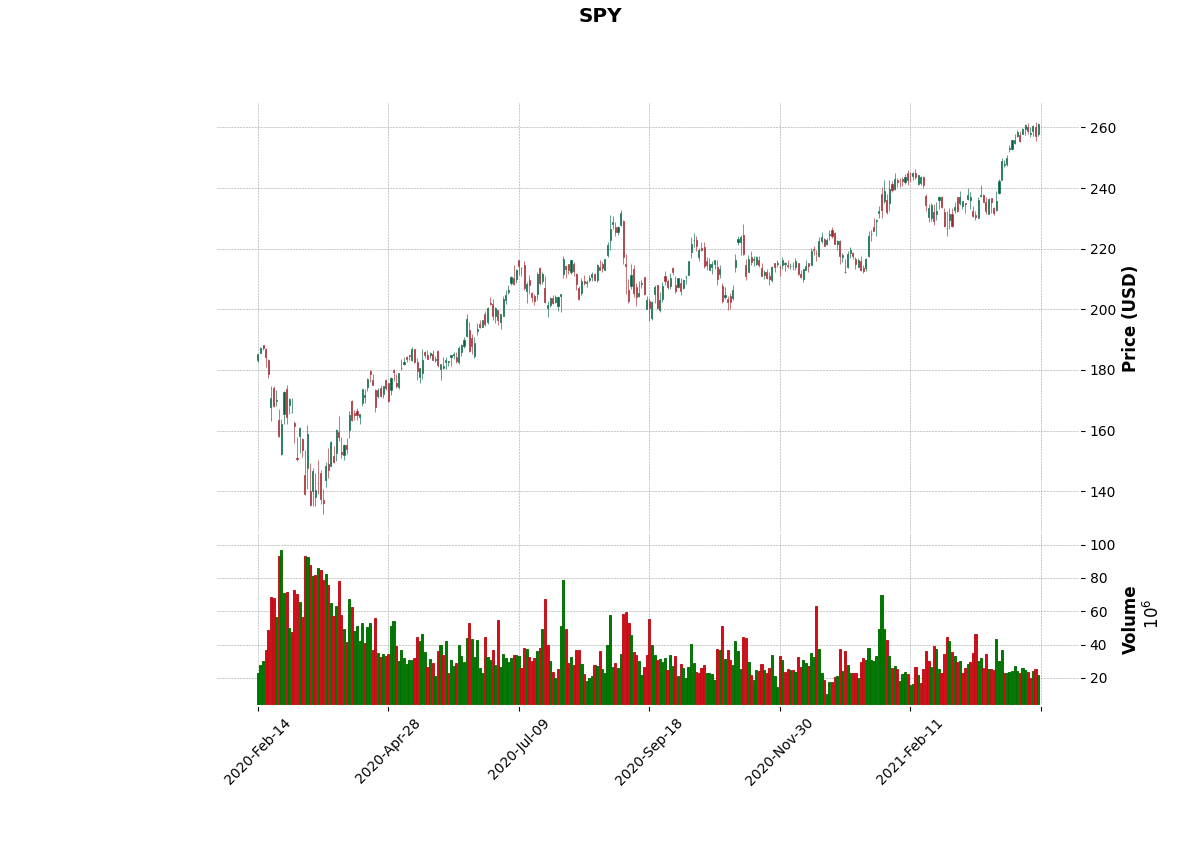

In [3]:
df.columns = ["open", "high", "low", "close", "volume"]
#df = df.iloc[::-1]

mpf.plot(df.tail(300), type='candle', style='charles',
        title='SPY',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        )

In [4]:
df.dtypes
#df['Datetime'] = pd.to_datetime(df['Date'], format="%Y/%m/%d")

open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object

<IPython.core.display.Javascript object>


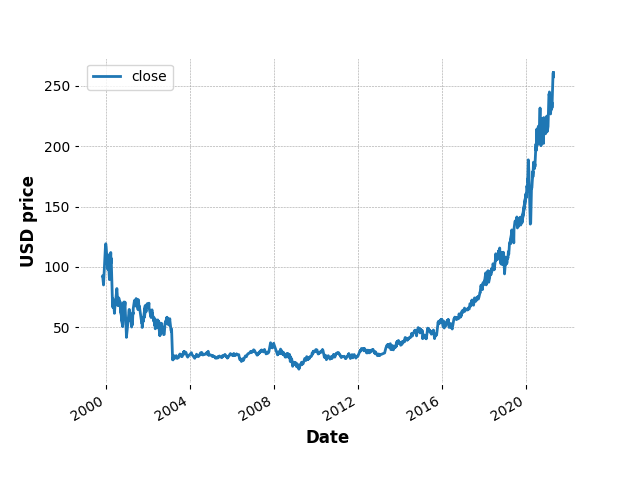

Text(0.5, 0, 'Date')

In [5]:
ax = df.plot(y='close')

ax.set_ylabel("USD price")
ax.set_xlabel("Date")

In [6]:
import math
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['close'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['close']-dataset['26ema'])

    # Create Bollinger Bands
    dataset['21sd'] =  dataset['close'].rolling(window=21).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['21sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['21sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['close']-1
    dataset['log-momentum'] = np.log(dataset['momentum'])
    
    return dataset

In [7]:
dataset_TI_df = get_technical_indicators(df)

<IPython.core.display.Javascript object>


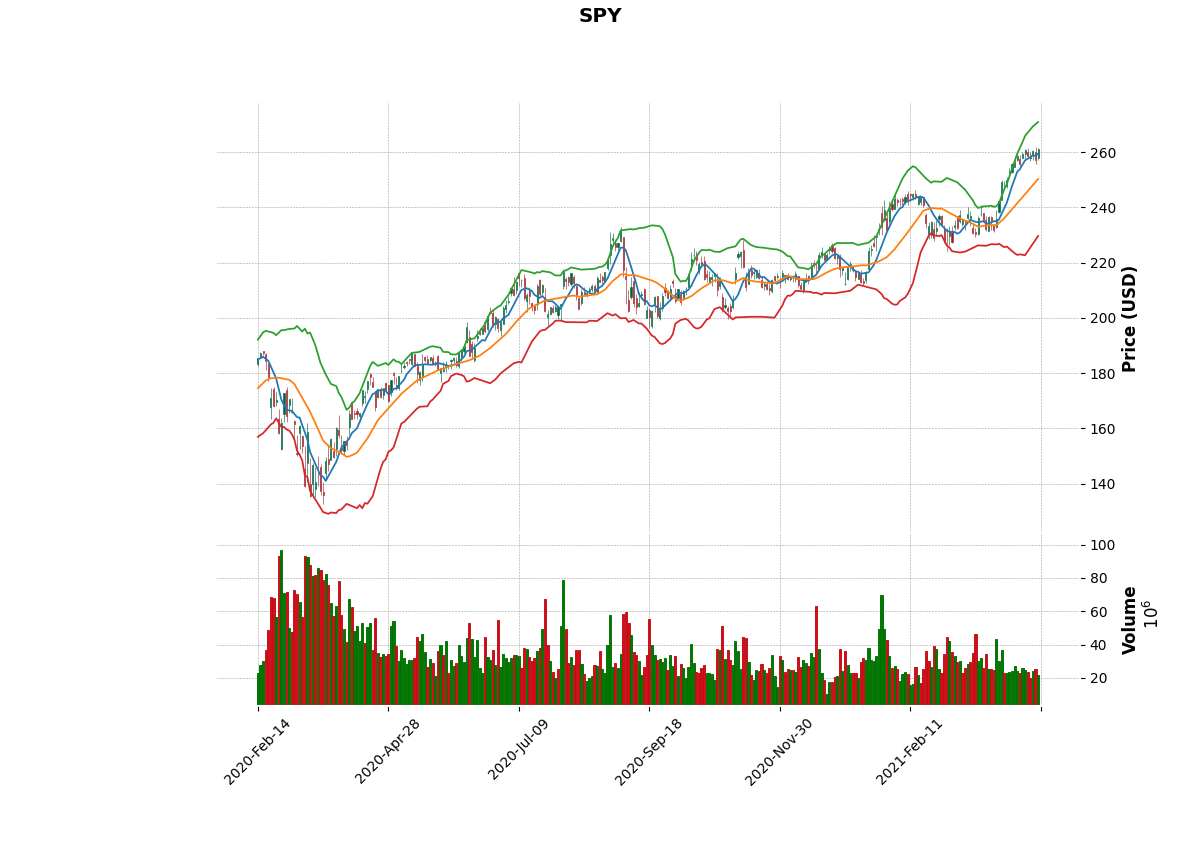

In [8]:
import mplfinance as mpf

bands_plot = pd.concat([dataset_TI_df['ma7'].tail(300), dataset_TI_df['ma21'].tail(300), 
                        dataset_TI_df['upper_band'].tail(300), dataset_TI_df['lower_band'].tail(300)], axis=1)

apd = mpf.make_addplot(bands_plot)

mpf.plot(dataset_TI_df.tail(300), type='candle', style='charles',
        title='SPY',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        addplot=apd
        )

In [9]:
import matplotlib.pyplot as plt

def plot_technical_indicators(dataset, last_days):
  
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    print(xmacd_)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Microsofts - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.plot(dataset['log-momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


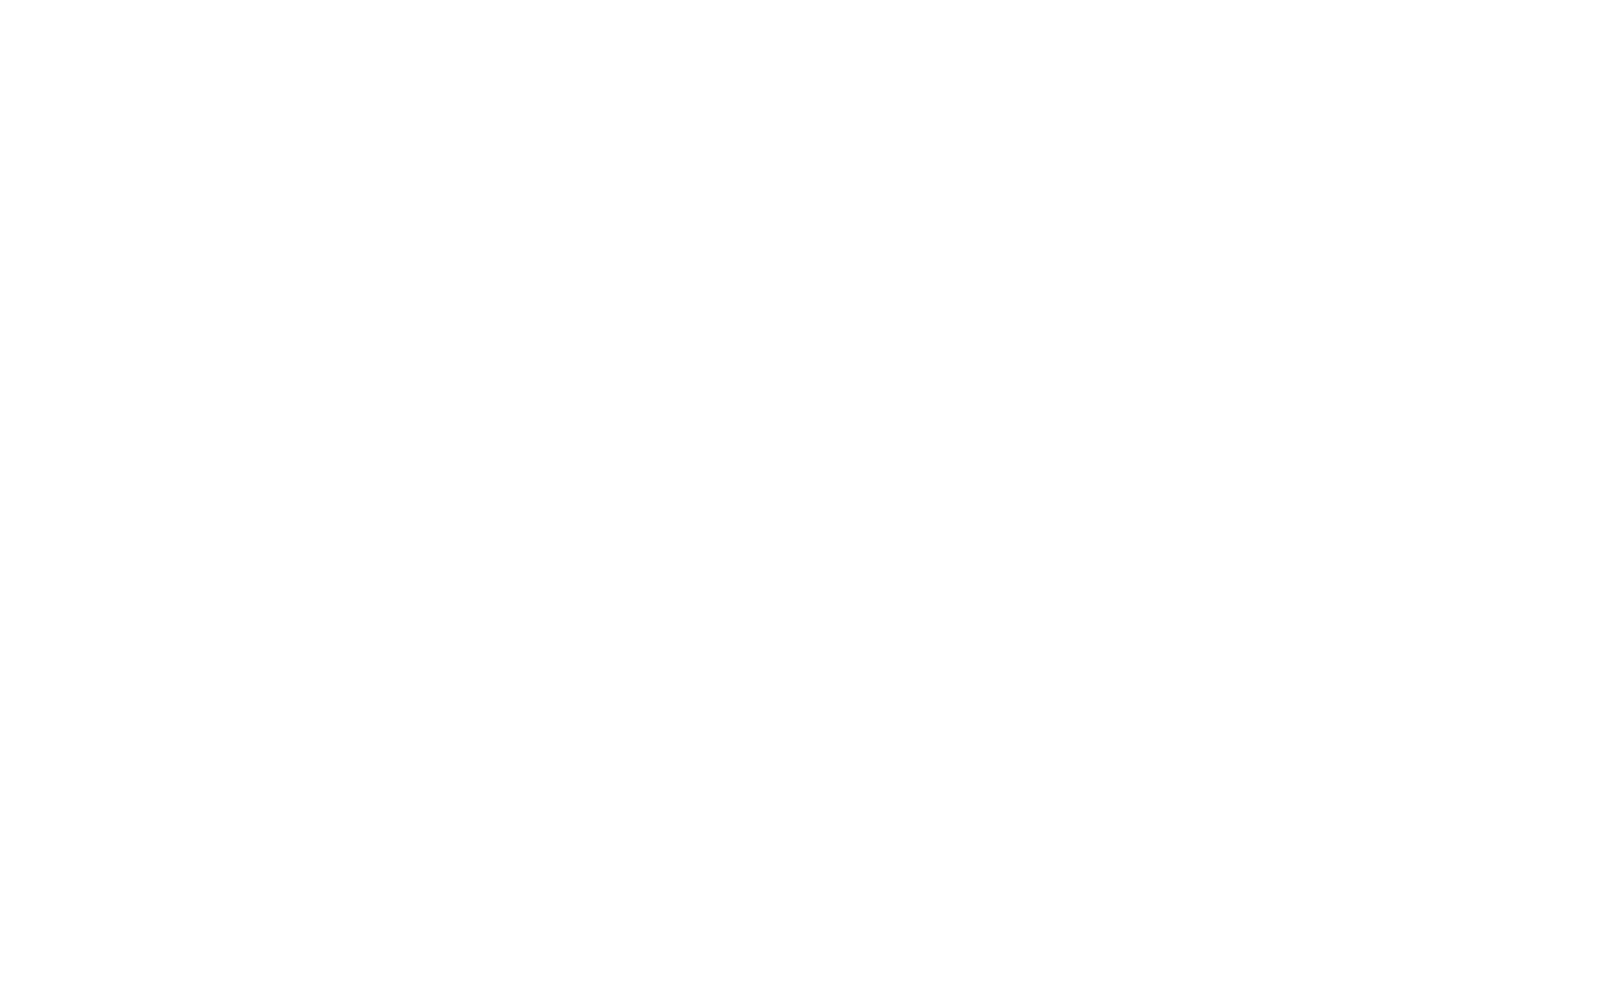

0


In [10]:
plot_technical_indicators(dataset_TI_df, 400)

In [52]:
dataset_TI_df

,open,high,low,close,volume,ma7,ma21,26ema,12ema,MACD,21sd,upper_band,lower_band,ema,momentum,log-momentum
date,,,,,,,,,,,,,,,,
1999-11-01,93.25,94.19,92.120,92.37,26630600.0,NaN,NaN,92.370000,92.370000,0.000000,NaN,NaN,NaN,92.370000,91.37,4.514917
1999-11-02,92.75,94.50,91.940,92.56,23174500.0,NaN,NaN,92.468654,92.472917,0.091346,NaN,NaN,NaN,92.512500,91.56,4.516994
1999-11-03,92.94,93.50,91.500,92.00,22258500.0,NaN,NaN,92.300271,92.288337,-0.300271,NaN,NaN,NaN,92.157692,91.00,4.510860
1999-11-04,92.31,92.75,90.310,91.75,27119700.0,NaN,NaN,92.146439,92.118405,-0.396439,NaN,NaN,NaN,91.882500,90.75,4.508108
1999-11-05,91.81,92.87,90.500,91.56,35083700.0,NaN,NaN,92.010442,91.966688,-0.450442,NaN,NaN,NaN,91.666612,90.56,4.506013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-19,260.19,261.48,257.821,258.74,23209260.0,257.831429,245.633810,246.907975,253.482620,11.832025,10.773062,267.179933,224.087686,259.147342,257.74,5.551951
2021-04-20,257.82,260.20,256.840,258.26,19722875.0,258.175714,246.962857,247.748866,254.217602,10.511134,10.511682,267.986221,225.939493,258.555781,257.26,5.550087
2021-04-21,258.94,260.68,257.250,260.58,24030383.0,258.842857,248.133810,248.699320,255.196432,11.880680,10.597496,269.328802,226.938817,259.905260,259.58,5.559065


In [58]:
df_vix = pd.read_csv("./data/vix-daily.csv", header=0, index_col="Date", parse_dates=True)

df_vix.index.names = ['date']


In [59]:
    
dataset_TI = pd.merge(dataset_TI_df, df_vix, on=["date"])
dataset_TI.to_csv(f'./data/test.csv')